# 落単経験者が作る神のカンペ（cs3第五回：データの集計編）

# 1. 1列の値による分類と集計(groupby)

#### ・groupbyを用いると、カテゴリデータである1列の各値によってデータを分類し、残りの各列のデータの最大、最小、平均などの統計量を求めることができます。

### 変数 = df.groupby('列名').統計関数()
#### (統計関数:最大 max(),最小 min(),平均mean(), 数 size()など)
##### ※データフレームが統計関数が適用できない非数値列を含む場合は、あらかじめ削除しておくか、統計関数に numeric_only=True オプションをつける。

### 例 Aggregation using groupby

##### df_no_channel = df.drop(columns='Channel')
##### df_region_max = df_no_channel.groupby('Region').max()
##### display(df_region_max)

#### あらかじめ、カテゴリー変数の列である Channel を削除しておく (df_no_channelに代入)。Region列の値ごとに、残りの列の最大値が求まる。

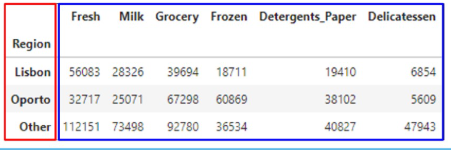

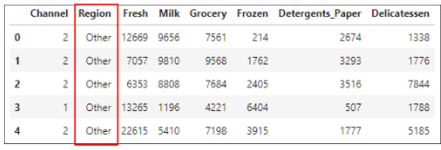

カテゴリー変数の1列、たとえば Region列に着目して、
Region列がOtherの顧客
というように、その値をもとにデータを分類してまとめることができるのが groupby()。さらにそれに対してmean()などの統計関数を適用することで、
Region列がOtherの顧客の各列の平均
というように、各分類グループにおける統計量を一気に求めることができるぞ！！！

# 2. groupby結果の各値の取得

得られた結果(今の場合 df_region_max) もデータフレームであるため、 それぞれの列や値を、これまでと同様に取り出すことができるぞ！！！

### 例 Region列がLisbonの顧客の Milk 列の最大値を取得
#### max_lisbon_milk = df_region_max.at['Lisbon', 'Milk'] print(max_lisbon_milk)
#### 28326

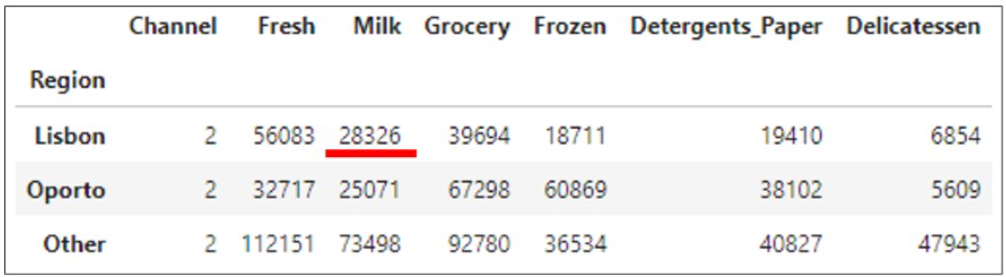

# 3. 2列の値によって分類し数をカウント(crosstab)

#### ・カテゴリ変数である2列で全データを分類し、データ数を集計。
### 変数 = pd.crosstab (列1のSeries, 列2のSeries)
#### DataFrameのメソッドである groupby と違って、crosstab は Pandas の関数なので注意しろよ。

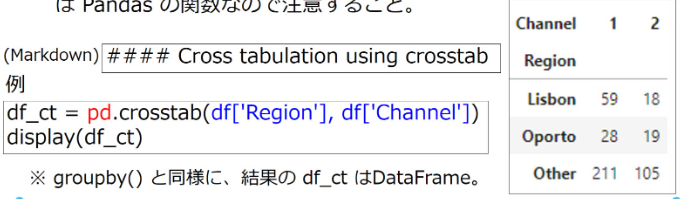

#### (コピペ用) df_ct = pd.crosstab (df['Region'], df['Channel'])
####           display(df_ct)

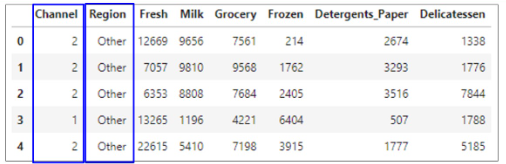

#### カテゴリー変数の2列、たとえば Region列とChannel列に着目して、 Region列の値が Lisbon でかつ Channel列の値が2の顧客の数は?
#### というように、2列の値の組み合わせでデータをグループ分けして、それぞれのグループのデータ数をカウントすることができるのが crosstab()。

#### ・margins=True オプションを指定すると、行・列ごとの合計の列 (All) を追加することができるぞ！！！

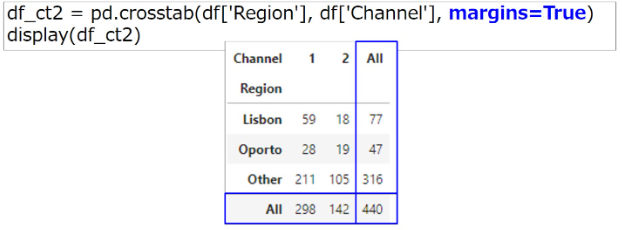

#### （コピペ用）df_ct2 = pd.crosstab(df['Region'], df['Channel'], margins=True) 
#### display(df_ct2)

- (発展) 和が1になるように正規化することもできるぞ！！！
    - 列の和が1: normalize='columns', 行の和が1: normalize='index'
    - 全セルの和が1: normalize='all'

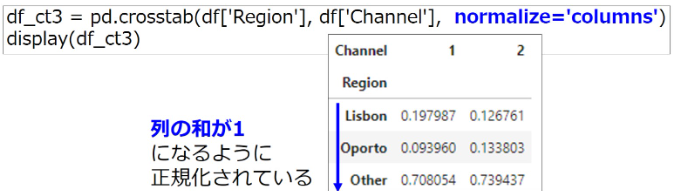

#### （コピペ用）df_ct3 = pd.crosstab (df['Region'], df['Channel'], normalize='columns') 
#### display(df_ct3)

# 4. (発展)ピボットテーブル

#### ・クロス集計と同様に、カテゴリ変数の2列でデータを分類。集計の際に、単に数を数えるだけでなく、平均、最大、最小などの統計量を求めることができます。

### 変数 = df.pivot_table(index='列1', columns='列2', values=['列3',･･･], aggfunc='統計関数名')

- index, columns は複数列名をリストで与えることもできる(とくに、出カデータフレームに残しておきたい列はindexで指定しておくとよい)
- values=をつけないと残りの全列が対象となる
- aggfunc=をつけないと 'mean'。このほか 'max' などの統計量を求める関数を指定可能。なお、関数名のみを文字列で指定し、()をつけないことに注意。

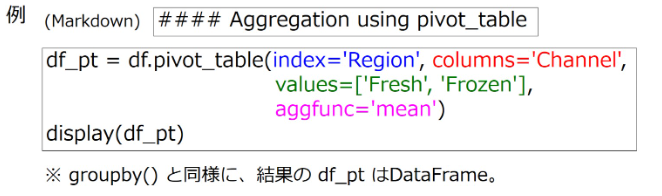

#### (コピペ用)df_pt = df.pivot_table(index='Region', columns='Channel', values=['Fresh', 'Frozen'], aggfunc='mean')
#### display(df_pt)

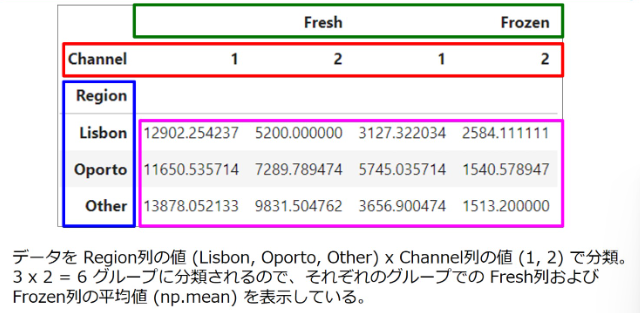

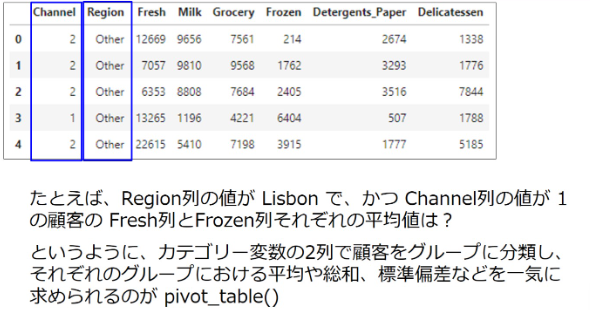